### Sandbox: pre-processing for pendigits and KDD-cup

See datapreparation_xxx.py for the final scripts to generate the workshop data

** 1.** Pendigits

In [6]:
from scipy.io import arff
import pandas as pd
import os
import numpy as np
%matplotlib inline

In [2]:
os.getcwd()

'/Users/ernstoldenhof/Projects/AMLD2020_workshop/amld2020-unsupervised'

In [3]:
X_PATH = 'data/x_pendigits.pkl'
Y_PATH = 'data/y_pendigits.pkl'

In [4]:
X_PATH

'data/x_pendigits.pkl'

In [5]:
pendigits_path = r'data/PenDigits_withoutdupl_norm_v01.arff'

In [6]:
data = arff.loadarff(pendigits_path)
df = pd.DataFrame(data[0])
df = df.drop(columns=['id'])
df.outlier = df.outlier.map({b"'yes'":1, b"'no'":0})
df = df.sample(frac=1, random_state=2718)
df = df.reset_index(drop=True)

In [7]:
df.drop(columns='outlier').to_pickle(X_PATH)
df.outlier.to_pickle(Y_PATH)

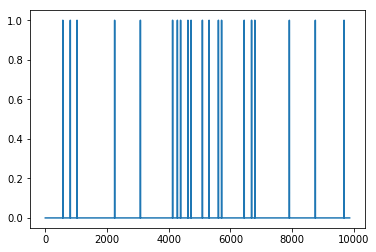

In [8]:
df.outlier.plot(kind='line')

In [22]:
df.sample(4)

,att1,att2,att3,att4,att5,att6,att7,att8,att9,att10,att11,att12,att13,att14,att15,att16,outlier
1208,0.0,0.0,39.0,9.0,74.0,28.0,95.0,52.0,100.0,79.0,73.0,100.0,42.0,85.0,77.0,67.0,0
6621,41.0,67.0,100.0,96.0,9.0,100.0,0.0,66.0,88.0,79.0,96.0,74.0,62.0,37.0,42.0,0.0,0
4149,0.0,65.0,26.0,99.0,36.0,100.0,38.0,63.0,40.0,27.0,4.0,0.0,23.0,1.0,100.0,1.0,0
4790,100.0,100.0,54.0,80.0,24.0,55.0,0.0,28.0,0.0,0.0,57.0,1.0,61.0,22.0,0.0,15.0,0


** 2. ** KDD cup data

In [28]:
import pandas as pd
from scipy.io import arff
import numpy as np

## Path definitions
X_PATH = 'data/x_kdd.pkl'
Y_PATH = 'data/y_kdd.pkl'
kddcup_path = r'data/KDDCup99_original.arff'


## Load data
data = arff.loadarff(kddcup_path)

df = pd.DataFrame(data[0])



In [29]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outlier,id
0,0.0,"b""'udp'""","b""'private'""","b""'SF'""",105.0,146.0,0.0,0.0,0.0,0.0,...,1.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,"b""'no'""",1.0
1,0.0,"b""'udp'""","b""'private'""","b""'SF'""",105.0,146.0,0.0,0.0,0.0,0.0,...,1.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,"b""'no'""",2.0
2,0.0,"b""'udp'""","b""'private'""","b""'SF'""",105.0,146.0,0.0,0.0,0.0,0.0,...,1.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,"b""'no'""",3.0
3,0.0,"b""'udp'""","b""'domain_u'""","b""'SF'""",29.0,0.0,0.0,0.0,0.0,0.0,...,0.30,0.30,0.3,0.0,0.0,0.0,0.0,0.0,"b""'no'""",7.0
4,0.0,"b""'udp'""","b""'private'""","b""'SF'""",105.0,146.0,0.0,0.0,0.0,0.0,...,0.99,0.01,0.0,0.0,0.0,0.0,0.0,0.0,"b""'no'""",8.0


In [26]:
str_df_columns = df.select_dtypes([np.object]).columns
for col in str_df_columns:
    df[col] = df[col].str.decode('utf-8')
    df[col] = df[col].apply(lambda x: x.lstrip('\'').rstrip('\''))
df.outlier = df.outlier.map({'yes':1, 'no':0})    

AttributeError: 'float' object has no attribute 'lstrip'

In [27]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,outlier,id
0,0.0,NaN,private,SF,105.0,146.0,0.0,0.0,0.0,0.0,...,1.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,no,1.0
1,0.0,NaN,private,SF,105.0,146.0,0.0,0.0,0.0,0.0,...,1.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,no,2.0
2,0.0,NaN,private,SF,105.0,146.0,0.0,0.0,0.0,0.0,...,1.00,0.01,0.0,0.0,0.0,0.0,0.0,0.0,no,3.0
3,0.0,NaN,domain_u,SF,29.0,0.0,0.0,0.0,0.0,0.0,...,0.30,0.30,0.3,0.0,0.0,0.0,0.0,0.0,no,7.0
4,0.0,NaN,private,SF,105.0,146.0,0.0,0.0,0.0,0.0,...,0.99,0.01,0.0,0.0,0.0,0.0,0.0,0.0,no,8.0


In [22]:
df.shape

(60839, 43)

In [24]:
df.duplicated(df.drop(columns=['id']).columns).sum()

12726

NB: duplicate removal needed! Do this in the course code

In [ ]:
df = df.drop(columns=['id'])
df.outlier = df.outlier.map({b"'yes'":1, b"'no'":0})
df = df.sample(frac=1, random_state=2718)
df = df.reset_index(drop=True)


## Pickle the output
df.drop(columns='outlier').to_pickle(X_PATH)
df.outlier.to_pickle(Y_PATH)